# Udacity AB Testing Final Project

### Experiment Overview: Free Trial Screener

At the time of this experiment, Udacity courses currently have two options on the course overview page: "start free trial", and "access course materials". If the student clicks "start free trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.


In the experiment, Udacity tested a change where if the student clicked "start free trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. [This screenshot](https://drive.google.com/file/d/0ByAfiG8HpNUMakVrS0s4cGN2TjQ/view) shows what the experiment looks like.


The hypothesis was that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The unit of diversion is a cookie, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

**Null Hypothesis** : This approach might not make a significant change and might not be effective in reducing the early Udacity course cancellation.

**Alternative Hypothesis** : This might reduce the number of frustrated students who left the free trial because they didn't have enough time, without significantly reducing the number of students to continue past the free trial and eventually complete the course.

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image

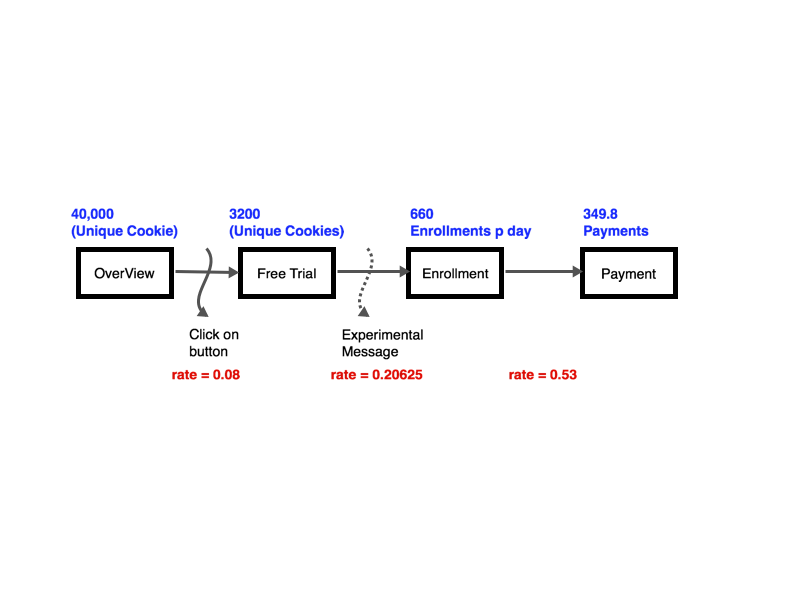

In [5]:
display(Image(filename='D:/Jupyter_Notebook/Mini_Projects/Udacity_AB_Testing_Final_Project/download.png',width=1000, height=1000))

In [11]:
baseline = pd.DataFrame(data=[40000,3200,660,0.08,0.20625,0.53,0.1093125],
                        index=['Unique cookies to view course overview page per day:','Unique cookies to click "Start free trial" per day:','Enrollments per day:','Click-through-probability on Start free trial:','Probability of enrolling, given click:','Probability of payment, given enroll:','Probability of payment, given click'],
                        columns = ['number'])
baseline

,number
Unique cookies to view course overview page per day:,40000.000000
"Unique cookies to click ""Start free trial"" per day:",3200.000000
Enrollments per day:,660.000000
Click-through-probability on Start free trial:,0.080000
"Probability of enrolling, given click:",0.206250
"Probability of payment, given enroll:",0.530000
"Probability of payment, given click",0.109313


## Metric Choice

Which of the following metrics would you choose to measure for this experiment and why? For each metric you choose, indicate whether you would use it as an invariant metric or an evaluation metric. The practical significance boundary for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes.


Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.


- **Number of cookies**: That is, number of unique cookies to view the course overview page. (dmin=3000)
- **Number of user-ids**: That is, number of users who enroll in the free trial. (dmin=50)
- **Number of clicks**: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- **Click-through-probability**: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- **Gross conversion**: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- **Retention**: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- **Net conversion**: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

You should also decide now what results you will be looking for in order to launch the experiment. Would a change in any one of your evaluation metrics be sufficient? Would you want to see multiple metrics all move or not move at the same time in order to launch? This decision will inform your choices while designing the experiment.

Metrics Selection:
- **Number of cookies**: This should not be effected by the experiment, so its a invariant metric.
- **Number of user-ids**: We use cookie as our unit of diversion,this one may not be invariant, and it is not evaluation metric
- **Number of clicks**: This should not be effected by the experiment, so its a invariant metric.
- **Click-through-probability**: This is not an invariant metric or an evaluation metric. CTP is out of scope of this project. 
- **Gross conversion**: This is an evaluation metric
- **Retention**: This is an evaluation metric
- **Net conversion**: This is an evaluation metric

------
- **Invariant:** Number of cookies, Number of clicks
- **Evaluation:** Gross conversion, Retention, Net Conversion

## Measuring Variability
[This spreadsheet](https://docs.google.com/spreadsheets/d/1MYNUtC47Pg8hdoCjOXaHqF-thheGpUshrFA21BAJnNc/edit#gid=0) contains rough estimates of the baseline values for these metrics (again, these numbers have been changed from Udacity's true numbers).


For each metric you selected as an evaluation metric, estimate its standard deviation analytically. Do you expect the analytic estimates to be accurate? That is, for which metrics, if any, would you want to collect an empirical estimate of the variability if you had time?

- **Gross conversion**: 0.0.206250
- **Retention**: 0.53
- **Net conversion**: 0.1093

#### Calculating Standard Deviation
For each metric you selected as an evaluation metric, make an analytic estimate of tis standard deviation, given a sample size of 5000 cookies visiting the course overview page.

For binomial distribution with probability p and population N, the analytical standard deviation is computed as

$$sd = \sqrt{\frac{p(1−p)}{N}}$$


In [14]:
Gross_conversion= 0.20625
Retention=0.53
Net_conversion=0.1093

Gross Conversion:
That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)

In [17]:
n_gross_conversion = 5000*0.08
SE_gross_conversion= np.sqrt(Gross_conversion*(1-Gross_conversion)/n_gross_conversion)
SE_gross_conversion

0.020230604137049392

Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)

In [18]:
n_retention = 5000*0.08*Gross_conversion
SE_retention = np.sqrt(Retention*(1-Retention)/n_retention)
SE_retention 

0.05494901217850908

Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

In [19]:
n_net_conversionn = 5000*0.08
SE_net_conversion = np.sqrt(Net_conversion*(1-Net_conversion)/n_net_conversionn)
SE_net_conversion 

0.015600762000620355

In [22]:
data={'Value':[Gross_conversion,Retention,Net_conversion],
     'SE':[SE_gross_conversion,SE_retention,SE_net_conversion]}
metric = pd.DataFrame(data,index=['Gross conversion','Retention','Net conversion'])
metric

,Value,SE
Gross conversion,0.20625,0.020231
Retention,0.53000,0.054949
Net conversion,0.10930,0.015601


## Sizing
Choosing Number of Samples given Power
Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? Use an alpha of 0.05 and a beta of 0.2. Make sure you have enough power for each metric.

Using [Evan's Awesome A/B Tool](https://www.evanmiller.org/ab-testing/sample-size.html)to calculate the sample size:

Gross Conversion
- Baseline Conversion: 20.625%
- Minimum Detectable Effect: 1%
- Alpha: 5%
- Beta: 20% -Sensitivity (1 - Beta): 80%
- Sample Size = 25,835 enrollments/group
- Number of groups = 2 (experiment and control)
- Total sample size = 25,835*2 = 51,670 enrollments
- Click-through-probability: 0.08 clicks/pageview
- Pageviews Required = 51,670/0.08=6,45,875

Retention
- Baseline Conversion: 53%
- Minimum Detectable Effect: 1%
- Alpha: 5%
- Beta: 20%
- Sensitivity (1 - Beta): 80%
- Sample size = 39,155 enrollments/group
- Number of groups = 2 (experiment and control)
- Total sample size = 78,230 enrollments
- Enrollments/pageview: 0.08*0.206250 = 0.0165 enrollments/pageview
- Pageviews = 78,230/0.0165 = 47,41,212

Net Conversion
- Baseline Conversion: 10.9313%
- Minimum Detectable Effect: 0.75%
- Alpha: 5% -Beta: 20%
- Sensitivity (1 - Beta): 80%
- Sample size = 27,413 enrollments/group
- Number of groups = 2 (experiment and control)
- Total sample size = 54,826 enrollments
- Click-through-probability: 0.08 clicks/pageview
- Pageviews = 54,826/0.08=6,85,325

In [38]:
metric['Sample Size']=[25835,39155 , 27413]
metric['Total Pageviews Needed']=[645875,4741212 , 685325]
metric

,Value,SE,Sample Size,Total Pageviews Needed
Gross conversion,0.20625,0.020231,25835,645875
Retention,0.53000,0.054949,39155,4741212
Net conversion,0.10930,0.015601,27413,685325


#### Choosing Duration vs. Exposure

In [39]:
# calculate time needed for the experiment
metric['Duration']= metric['Total Pageviews Needed']/40000
metric

,Value,SE,Sample Size,Total Pageviews Needed,Duration
Gross conversion,0.20625,0.020231,25835,645875,16.146875
Retention,0.53000,0.054949,39155,4741212,118.530300
Net conversion,0.10930,0.015601,27413,685325,17.133125


We see the time needed for rentention is 119 days which is too long for an experiment. So we should not use retention as an eveluation metric. 
Gross Conversion and Net Conversion could be our evaluation metrics. We only need **18 days** to evaluate these two metrics.

## Analysis

The data for you to analyze is [here](https://docs.google.com/spreadsheets/d/1Mu5u9GrybDdska-ljPXyBjTpdZIUev_6i7t4LRDfXM8/edit#gid=0). This data contains the raw information needed to compute the above metrics, broken down day by day. Note that there are two sheets within the spreadsheet - one for the experiment group, and one for the control group.


The meaning of each column is:

- **Pageviews**: Number of unique cookies to view the course overview page that day.
- **Clicks**: Number of unique cookies to click the course overview page that day.
- **Enrollments**: Number of user-ids to enroll in the free trial that day.
- **Payments**: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [40]:
control= pd.read_csv("Final Project Results - Control.csv")

experiment= pd.read_csv("Final Project Results - Experiment.csv")

In [45]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


**Null Hypothesis:** Any difference between the metric value of the two groups is due to chance. 

**Alternate Hypothesis:** The difference between the metric value of the two groups is significant. They are not due to random change.

#### Sanity Checks
Start by checking whether your invariant metrics are equivalent between the two groups. If the invariant metric is a simple count that should be randomly split between the 2 groups, you can use a binomial test as demonstrated in Lesson 5. Otherwise, you will need to construct a confidence interval for a difference in proportions using a similar strategy as in Lesson 1, then check whether the difference between group values falls within that confidence level.


If your sanity checks fail, look at the day by day data and see if you can offer any insight into what is causing the problem.

**Invariant Metrics:** 
- Number of cookies 
- Number of clicks

In [72]:
control_total_pageviews = control['Pageviews'].sum()
experiment_total_pageviews = experiment['Pageviews'].sum()
control_clicks = control['Clicks'].sum()
experiment_tclicks = experiment['Clicks'].sum()
sanity_data={'Total Pageview':[control_total_pageviews,experiment_total_pageviews],'Total Clicks':[control_clicks,experiment_tclicks]}
sanity = pd.DataFrame(sanity_data, index=['Control','Experiment'])
sanity = sanity.T
sanity["Expected ratio"]=[0.5,0.5]
sanity["Observed ratio"]= sanity["Control"]/(sanity["Control"]+sanity["Experiment"])
sanity["SE"]=np.sqrt(0.5*0.5/(sanity["Control"]+sanity['Experiment']))
sanity['Margin of error']=1.96*sanity["SE"]
sanity['CI_lower'] = sanity["Expected ratio"]-sanity['Margin of error']
sanity['CI_higher'] = sanity["Expected ratio"]+sanity['Margin of error']
sanity['Pass'] = np.where(((sanity['Observed ratio']>=sanity['CI_lower']) & (sanity['Observed ratio']<=sanity['CI_higher'])),'True','False')
sanity.T

,Total Pageview,Total Clicks
Control,345543,28378
Experiment,344660,28325
Expected ratio,0.5,0.5
Observed ratio,0.50064,0.500467
SE,0.000601841,0.00209975
Margin of error,0.00117961,0.0041155
CI_lower,0.49882,0.495884
CI_higher,0.50118,0.504116
Pass,True,True


Both of the invariant metrics pass the sanity check.

#### Check for Practical and Statistical Significance
Next, for your evaluation metrics, calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)


If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?

**Evaluation:** 
- Gross conversion,
- Net Conversion

In [84]:
control_14days_pageviews = control.dropna()['Pageviews'].sum()
control_14days_clicks = control.dropna()['Clicks'].sum()
control_enrollments = control['Enrollments'].sum()
control_payments= control['Payments'].sum()

experiment_14days_pageviews = experiment.dropna()['Pageviews'].sum()
experiment_14days_clicks = experiment.dropna()['Clicks'].sum()
experiment_enrollments= experiment['Enrollments'].sum()
experiment_payments= experiment['Payments'].sum()

evaluation_data={'Pageviews':[control_14days_pageviews,experiment_14days_pageviews],
                'Clicks':[control_14days_clicks,experiment_14days_clicks],
                'Enrollment':[control_enrollments,experiment_enrollments],
                'Payment':[control_payments,experiment_payments]}
evaluation = pd.DataFrame(evaluation_data,index=["Control","Experiment"])
evaluation['Gross conversion']= evaluation['Enrollment']/evaluation['Clicks']
evaluation['Net Conversion']= evaluation['Payment']/evaluation['Clicks']
evaluation

,Pageviews,Clicks,Enrollment,Payment,Gross conversion,Net Conversion
Control,212163,17293,3785.0,2033.0,0.218875,0.117562
Experiment,211362,17260,3423.0,1945.0,0.198320,0.112688


In [87]:
results = {'dmin':[0.01,0.0075],
           'Observed Difference':[0.198320-0.218875,0.112688-0.117562]}
analysis = pd.DataFrame(results,index=['Gross Conversion','Net Conversion'])
analysis

,dmin,Observed Difference
Gross Conversion,0.0100,-0.020555
Net Conversion,0.0075,-0.004874


In [91]:
GC_p_pool = (3785.0+3423.0)/(17293+17260)
GC_SE_pool= np.sqrt(GC_p_pool*(1-GC_p_pool)*(1/17293+1/17260))

NC_p_pool = (2033.0+1945.0)/(17293+17260)
NC_SE_pool= np.sqrt(NC_p_pool*(1-NC_p_pool)*(1/17293+1/17260))

In [98]:
analysis["SE"]=[GC_SE_pool,NC_SE_pool]
analysis['Margin of error'] = 1.96*analysis["SE"]
analysis['CI_lower'] = analysis["Observed Difference"]-analysis['Margin of error']
analysis['CI_higher'] = analysis["Observed Difference"]+analysis['Margin of error']
analysis['Stat. significant ( 0 not in bounds)']=['True','False']
analysis['Practically significant ( d_min not in bounds)']=['True','False']
analysis.T

,Gross Conversion,Net Conversion
dmin,0.01,0.0075
Observed Difference,-0.020555,-0.004874
SE,0.00437168,0.00343413
Margin of error,0.00856848,0.0067309
CI_lower,-0.0291235,-0.0116049
CI_higher,-0.0119865,0.0018569
Stat. significant ( 0 not in bounds),True,False
Practically significant ( d_min not in bounds),True,False


#### Run Sign Tests
For each evaluation metric, do a sign test using the day-by-day breakdown. If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.

In [114]:
control['Gross Conversion'] = control['Enrollments']/control['Clicks']
experiment['Gross Conversion'] = experiment['Enrollments']/experiment['Clicks']
print(control['Gross Conversion'].dropna().shape)
print(experiment['Gross Conversion'].dropna().shape)

(23,)
(23,)


In [117]:
# There are 23 trials, 19 successes
(experiment['Gross Conversion']<control['Gross Conversion']).sum()

19

By using this [calculator](https://www.graphpad.com/quickcalcs/binomial1/), we figured that the two-tail **P value for Gross conversion is 0.0026**

In [122]:
control['Net Conversion'] = control['Payments']/control['Clicks']
experiment['Net Conversion'] = experiment['Payments']/experiment['Clicks']
print(control['Net Conversion'].dropna().shape)
print(experiment['Net Conversion'].dropna().shape)

(23,)
(23,)


In [121]:
# There are 23 trials, 13 successes
(experiment['Net Conversion']<control['Net Conversion']).sum()

13

By using this [calculator](https://www.graphpad.com/quickcalcs/binomial1/), we figured that the two-tail 

**P value for Gross conversion is 0.0026**

**P value for Net Conversion is 0.6776.**

## Recommendation

This experiment is designed to improve the overall experience of students and the coaches' capacity to support students who are likely to complete the course, without significantly reducing the number of students who continue past the free trial. The Gross Conversion showed both a statistically and practical significant decrease. We also see no significant difference in Net Conversion. Overall, my suggestion is **not to launch this change**, since the experiment shows that this change might hurt the gross conversion rate.